In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
# Read the traffic data
df = pd.read_csv('trafficdata.csv')
df

,Time,Congestion
0,Evening,Low
1,Morning,High
2,Evening,Low
3,Morning,High
4,Morning,Low
...,...,...
495,Morning,High
496,Morning,High
497,Morning,High
498,Evening,High


In [ ]:
# Create a contingency table of observed frequencies
observed = pd.crosstab(df['Time'], df['Congestion'])
print("\nObserved Frequencies:")
print(observed)

# Calculate expected frequencies
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)
print("\nExpected Frequencies:")
print(pd.DataFrame(expected,
                  index=observed.index,
                  columns=observed.columns))

# Print test results
print(f'\nChi-square statistic: {chi2_stat:.2f}')
print(f'Degrees of freedom: {dof}')
print(f'P-value: {p_value:.4f}')

# Set significance level
alpha = 0.05
critical_value = stats.chi2.ppf(1 - alpha, dof)
print(f'Critical value (0.05 significance level): {critical_value:.2f}')

# Conclusion
if chi2_stat > critical_value:
    print('\nReject the null hypothesis. There is a significant relationship between time of day and congestion levels.')
else:
    print('\nFail to reject the null hypothesis. There is no significant relationship between time of day and congestion levels.')

# Create a bar plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot observed frequencies
observed.plot(kind='bar', ax=ax1)
ax1.set_title('Observed Frequencies')
ax1.set_xlabel('Time of Day')
ax1.set_ylabel('Frequency')
ax1.legend(title='Congestion Level')

# Plot expected frequencies
pd.DataFrame(expected,
            index=observed.index,
            columns=observed.columns).plot(kind='bar', ax=ax2)
ax2.set_title('Expected Frequencies')
ax2.set_xlabel('Time of Day')
ax2.set_ylabel('Frequency')
ax2.legend(title='Congestion Level')

plt.tight_layout()
plt.savefig('traffic_chi_square.png')
plt.close()


Observed Frequencies:
Congestion  High  Low
Time                 
Evening       98  147
Morning      157   98

Expected Frequencies:
Congestion    High     Low
Time                      
Evening     124.95  120.05
Morning     130.05  124.95

Chi-square statistic: 22.41
Degrees of freedom: 1
P-value: 0.0000
Critical value (0.05 significance level): 3.84

Reject the null hypothesis. There is a significant relationship between time of day and congestion levels.


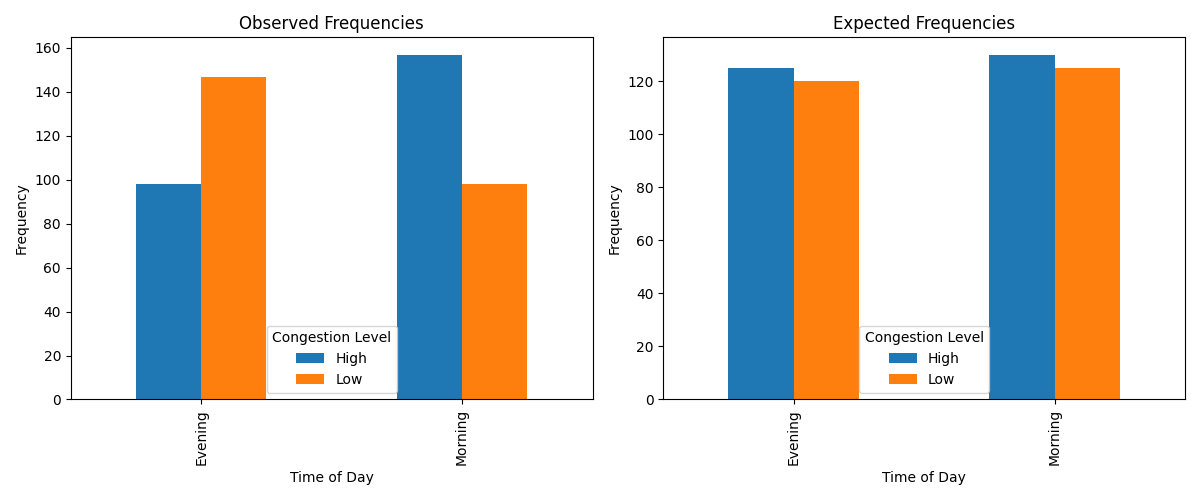

In [ ]:
# prompt: show /content/traffic_chi_square.png

from IPython.display import Image
Image('/content/traffic_chi_square.png')